<a href="https://colab.research.google.com/github/yeonghun00/stock_public/blob/main/analysis/macroecon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 참고: https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiOrteView.kci?sereArticleSearchBean.artiId=ART002113508

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import ast
import json

class Stock:
  def __init__(self, code):
    self.code = code
    self.headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}

  def get_price(self, start:str='20180501', end:str=str(datetime.datetime.now().date().strftime("%Y%m%d")), interval='day'):
    url ='https://api.finance.naver.com/siseJson.naver?symbol=' + self.code + '&requestType=1&startTime=' \
    + start + '&endTime=' + end +  '&timeframe=' + interval

    result = requests.get(url)
    bs_obj = BeautifulSoup(result.content, "html.parser")
    b = bs_obj.get_text()
    for i in ['\n', '\t', "\\", ' ']:
      b = b.replace(i,'')

    data = np.array(ast.literal_eval(b)[1:])

    dic = {'Date':list(map(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'), data[:,0])), \
      'Open':np.array(data[:,1], float), 'High':np.array(data[:,2], float), 'Low':np.array(data[:,3], float),\
       'Close':np.array(data[:,4], float), 'Volume':np.array(data[:,5], float)}

    df = pd.DataFrame(data=dic)
    df = df.set_index('Date')
    return df

In [15]:
s = Stock('KOSPI')
kospi = s.get_price('20000101', '20210501', 'month')
kospi_change = kospi['Close']/kospi['Close'][0]
kospi

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-31,1028.33,1066.18,875.82,943.88,4798379.0
2000-02-29,955.44,991.71,810.53,828.38,5144645.0
2000-03-31,864.78,928.55,820.30,860.94,6536459.0
2000-04-28,866.75,880.41,688.36,725.39,4113517.0
2000-05-31,731.76,778.46,625.14,731.88,4940337.0
...,...,...,...,...,...
2020-12-30,2613.42,2878.21,2611.67,2873.47,24561038.0
2021-01-29,2874.50,3266.23,2869.11,2976.21,26093965.0
2021-02-26,2976.81,3180.94,2947.24,3012.95,30029588.0


In [8]:
# http://ecos.bok.or.kr/jsp/openapi/OpenApiController.jsp?t=guideStatCd&menuGroup=MENU000004&menuCode=MENU000024
api = 'NTD28IR6I6JDKW29OVKJ'

def get_data(code, unit, start_date, end_date, code2):
  url = 'http://ecos.bok.or.kr/api/StatisticSearch/' + api + '/json/kr/1/5000/' + f'{code}/{unit}/{start_date}/{end_date}/{code2}'
  response = requests.get(url)
  if response.status_code == 200:
      try:
          contents = response.text
      except Exception as e:
          print(str(e))
  df = pd.DataFrame(json.loads(contents)['StatisticSearch']['row'])
  df['DATA_VALUE'] = [float(x) for x in df['DATA_VALUE']]
  if unit == 'YY':
    df['TIME'] = [datetime.datetime.strptime(x, '%Y') for x in df['TIME']]
  elif unit == 'QQ':
    df['TIME'] = df['TIME'].astype(str).str[:-1] + (df['TIME'].astype(str).str[-1].astype(int)*3).astype(str)
    df['TIME'] = [datetime.datetime.strptime(x, '%Y%m') for x in df['TIME']]
  else:
    df['TIME'] = [datetime.datetime.strptime(x, '%Y%m') for x in df['TIME']]
  return df

In [9]:
# gdp growth rate
gdp_growth = get_data('901Y001', 'QQ', '200001', '202101', 'AI1AA')
gdp_growth

,UNIT_NAME,STAT_NAME,ITEM_CODE1,STAT_CODE,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,DATA_VALUE,ITEM_NAME3,TIME
0,%,17.거시경제분석 지표,AI1AA,901Y001,,,경제성장률,,1.9,,2000-03-01
1,%,17.거시경제분석 지표,AI1AA,901Y001,,,경제성장률,,1.3,,2000-06-01
2,%,17.거시경제분석 지표,AI1AA,901Y001,,,경제성장률,,2.8,,2000-09-01
3,%,17.거시경제분석 지표,AI1AA,901Y001,,,경제성장률,,-0.3,,2000-12-01
4,%,17.거시경제분석 지표,AI1AA,901Y001,,,경제성장률,,1.2,,2001-03-01
...,...,...,...,...,...,...,...,...,...,...,...
79,%,17.거시경제분석 지표,AI1AA,901Y001,,,경제성장률,,1.3,,2019-12-01
80,%,17.거시경제분석 지표,AI1AA,901Y001,,,경제성장률,,-1.3,,2020-03-01
81,%,17.거시경제분석 지표,AI1AA,901Y001,,,경제성장률,,-3.2,,2020-06-01
82,%,17.거시경제분석 지표,AI1AA,901Y001,,,경제성장률,,2.2,,2020-09-01


In [10]:
# employment rate
employ_rate = get_data('901Y001', 'QQ', '200001', '202101', 'AI1AK')
employ_rate

,UNIT_NAME,STAT_NAME,ITEM_CODE1,STAT_CODE,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,DATA_VALUE,ITEM_NAME3,TIME
0,%,17.거시경제분석 지표,AI1AK,901Y001,,,고용률,,56.6,,2000-03-01
1,%,17.거시경제분석 지표,AI1AK,901Y001,,,고용률,,59.1,,2000-06-01
2,%,17.거시경제분석 지표,AI1AK,901Y001,,,고용률,,59.3,,2000-09-01
3,%,17.거시경제분석 지표,AI1AK,901Y001,,,고용률,,59.0,,2000-12-01
4,%,17.거시경제분석 지표,AI1AK,901Y001,,,고용률,,56.6,,2001-03-01
...,...,...,...,...,...,...,...,...,...,...,...
79,%,17.거시경제분석 지표,AI1AK,901Y001,,,고용률,,61.4,,2019-12-01
80,%,17.거시경제분석 지표,AI1AK,901Y001,,,고용률,,59.9,,2020-03-01
81,%,17.거시경제분석 지표,AI1AK,901Y001,,,고용률,,60.0,,2020-06-01
82,%,17.거시경제분석 지표,AI1AK,901Y001,,,고용률,,60.4,,2020-09-01


In [11]:
# Seoul price
estate_change = get_data('901Y001', 'YY', '200001', '202101', 'AI1BFA')
estate_change

,UNIT_NAME,STAT_NAME,ITEM_CODE1,STAT_CODE,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,DATA_VALUE,ITEM_NAME3,TIME
0,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,-1.0,,2004-01-01
1,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,8.5,,2005-01-01
2,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,23.4,,2006-01-01
3,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,7.1,,2007-01-01
4,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,7.0,,2008-01-01
5,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,2.5,,2009-01-01
6,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,-2.1,,2010-01-01
7,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,-0.4,,2011-01-01
8,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,-6.7,,2012-01-01
9,%,17.거시경제분석 지표,AI1BFA,901Y001,,,아파트매매가격등락률(서울),,-1.2,,2013-01-01


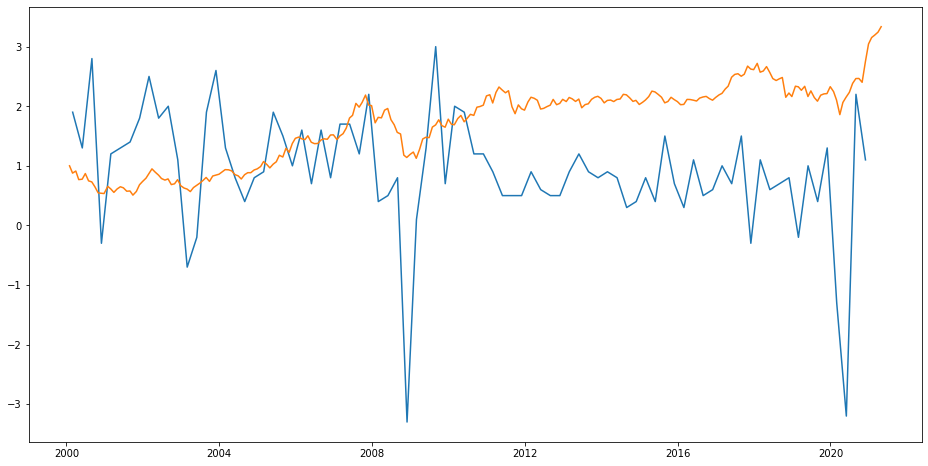

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(gdp_growth['TIME'], gdp_growth['DATA_VALUE'])
plt.plot(kospi_change)
plt.show()

Date
2000-01-31    1.000000
2000-02-29    0.877633
2000-03-31    0.912129
2000-04-28    0.768519
2000-05-31    0.775395
                ...   
2019-08-30    2.084788
2019-09-30    2.185712
2019-10-31    2.207357
2019-11-29    2.212103
2019-12-30    2.328336
Name: Close, Length: 240, dtype: float64